In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')


In [47]:
df=pd.read_csv("C:\\Users\\ASUS\\Downloads\\mall customer\\Mall_Customers.csv")

In [48]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [49]:
df.drop(['Gender','CustomerID'],axis=1,inplace=True)

In [50]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [51]:
df.rename(columns={'Age':'age','Annual Income (k$)':'income','Spending Score (1-100)':"score"},inplace=True)

In [52]:
df.head()

,age,income,score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [53]:
df.shape

(200, 3)

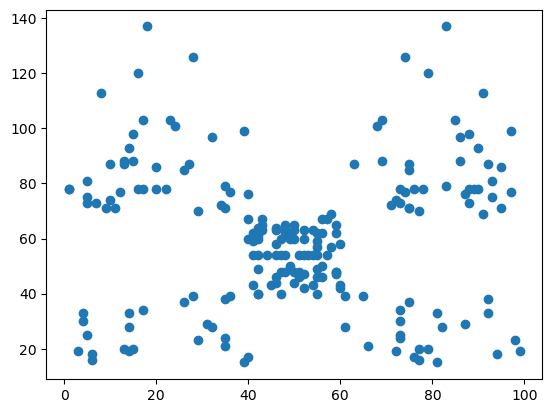

In [54]:
plt.scatter(df.score,df.income)

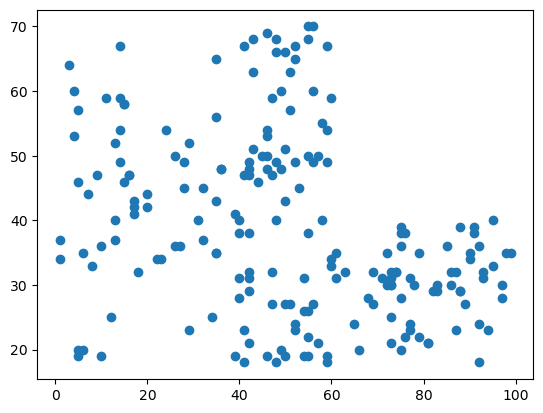

In [55]:
plt.scatter(df.score,df.age)

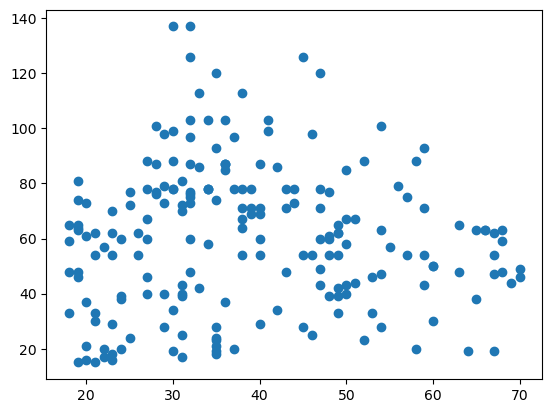

In [56]:
plt.scatter(df.age,df.income)

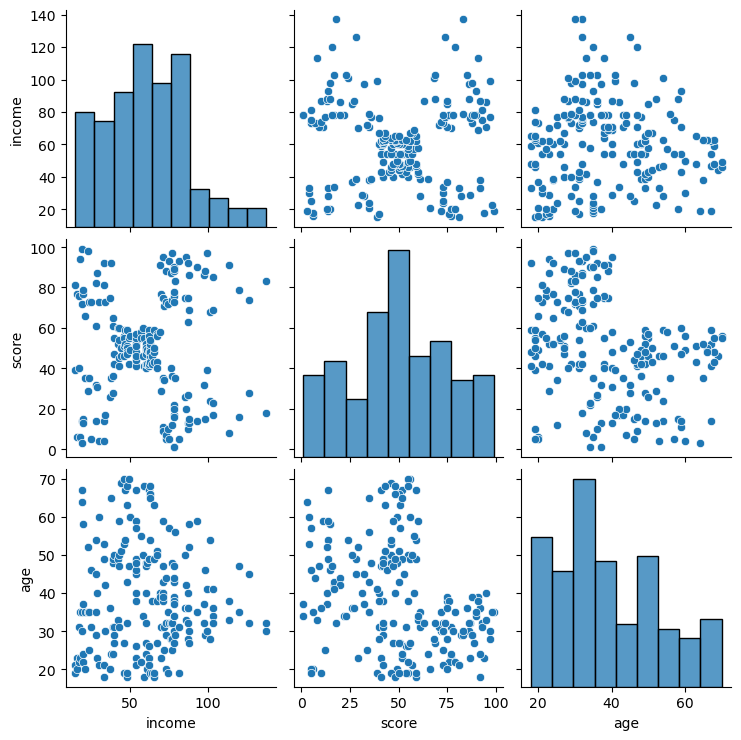

In [57]:
sns.pairplot(df[['income','score','age']])
plt.savefig('imge.png')

Text(0.5, 1.0, 'income and score plot from customers')

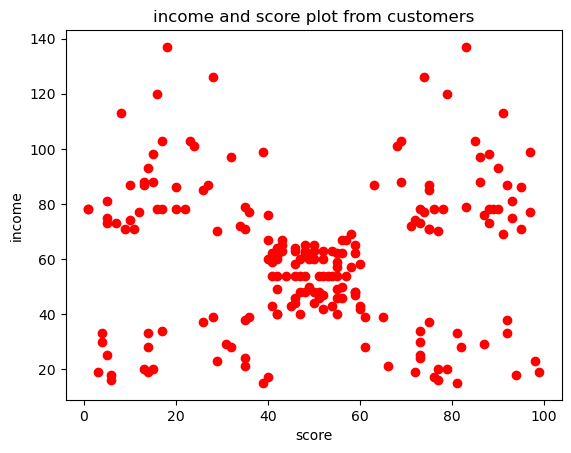

In [58]:
plt.scatter(df.score,df.income,color='red')
plt.xlabel("score")
plt.ylabel('income')
plt.title('income and score plot from customers')

In [59]:
from sklearn.cluster import KMeans

km=KMeans()

In [60]:
km=KMeans()

In [61]:
km.fit(df[['score','income']])

KMeans()

In [62]:
km.predict(df[['score','income']])

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 6, 0, 6, 6,
       4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 2, 6, 6, 2, 6, 2, 6, 6, 2, 2, 6, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 1, 2, 1, 3, 1, 3, 1,
       2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 2, 1, 3, 1, 2, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7,
       5, 7])

In [63]:
ce=km.cluster_centers_

In [64]:
ce

array([[ 80.04761905,  25.0952381 ],
       [ 81.89285714,  78.03571429],
       [ 47.29166667,  62.58333333],
       [ 13.39130435,  79.73913043],
       [ 19.52380952,  25.14285714],
       [ 22.        , 109.7       ],
       [ 51.26315789,  45.97368421],
       [ 82.72727273, 108.18181818]])

In [66]:
df['group1']=km.predict(df[['score','income']])

In [67]:
df.head()

,age,income,score,group1
0,19,15,39,4
1,21,15,81,0
2,20,16,6,4
3,23,16,77,0
4,31,17,40,4


In [68]:
df.tail()

,age,income,score,group1
195,35,120,79,7
196,45,126,28,5
197,32,126,74,7
198,32,137,18,5
199,30,137,83,7


In [69]:
df0=df[df.group1==0]
df1=df[df.group1==1]
df2=df[df.group1==2]
df3=df[df.group1==3]
df4=df[df.group1==4]
df5=df[df.group1==5]
df6=df[df.group1==6]
df7=df[df.group1==7]

In [70]:
df.head()

,age,income,score,group1
0,19,15,39,4
1,21,15,81,0
2,20,16,6,4
3,23,16,77,0
4,31,17,40,4


In [72]:
df0.shape,df1.shape,df2.shape,df3.shape,df4.shape,df5.shape

((21, 4), (28, 4), (48, 4), (23, 4), (21, 4), (10, 4))

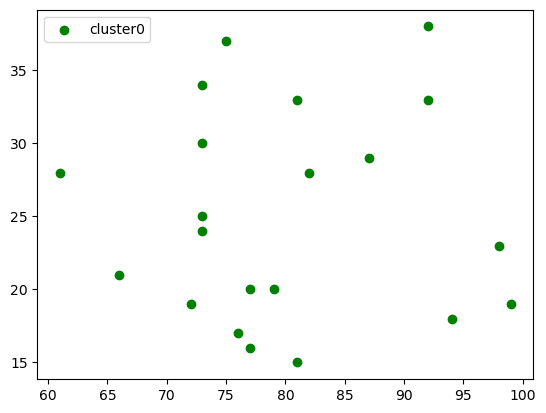

In [75]:
plt.scatter(df0.score,df0.income,color="green",label='cluster0')
plt.legend()

In [80]:
df0.score.min()

61

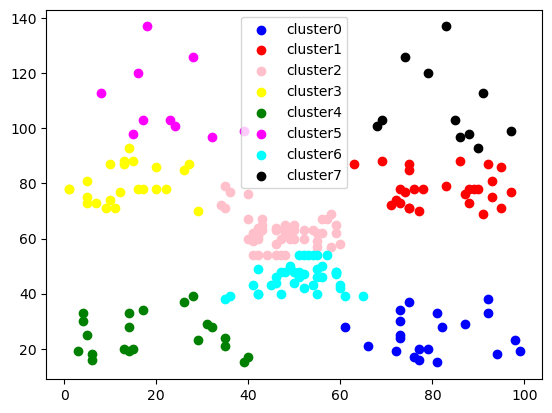

In [82]:
plt.scatter(df0.score,df0.income,color='blue',label='cluster0')
plt.scatter(df1.score,df1.income,color='red',label='cluster1')
plt.scatter(df2.score,df2.income,color='pink',label='cluster2')
plt.scatter(df3.score,df3.income,color='yellow',label='cluster3')
plt.scatter(df4.score,df4.income,color='green',label='cluster4')
plt.scatter(df5.score,df5.income,color='magenta',label='cluster5')
plt.scatter(df6.score,df6.income,color='cyan',label='cluster6')
plt.scatter(df7.score,df7.income,color='black',label='cluster7')
plt.legend()


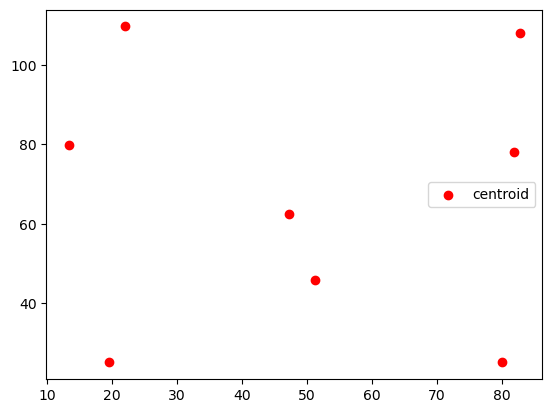

In [86]:
plt.scatter(ce[:,0],ce[:,1],color='red',label="centroid")
plt.legend()

plt.scatter(df0.score,df0.income,color='blue',label='cluster0')
plt.scatter(df1.score,df1.income,color='red',label='cluster1')
plt.scatter(df2.score,df2.income,color='pink',label='cluster2')
plt.scatter(df3.score,df3.income,color='yellow',label='cluster3')
plt.scatter(df4.score,df4.income,color='green',label='cluster4')
plt.scatter(df5.score,df5.income,color='magenta',label='cluster5')
plt.scatter(df6.score,df6.income,color='cyan',label='cluster6')
plt.scatter(df7.score,df7.income,color='black',label='cluster7')
plt.scatter(ce[:,0],ce[:,1],color='red',label="centroid",marker="*")
plt.legend()

In [89]:
km.inertia_

25043.970949607217

In [95]:
wcss=[]
for i in range(1,15):
    km2=KMeans(n_clusters=i)
    km2.fit(df[['score','income']])
    wcss.append(km2.inertia_)

In [96]:
wcss

[269981.28,
 182440.30762987013,
 106348.37306211119,
 73679.78903948837,
 44448.45544793371,
 37233.81451071001,
 31605.868380230873,
 25044.967764018926,
 21794.8856090982,
 19634.55462934998,
 17595.288881085184,
 15845.619372815676,
 14587.241927680163,
 12746.96909218233]

Text(0, 0.5, 'wcss')

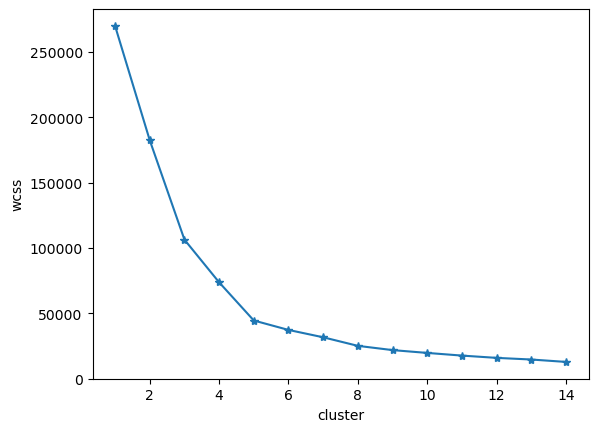

In [101]:
plt.plot(range(1,15),wcss,marker='*')
plt.xlabel('cluster')
plt.ylabel('wcss')

In [107]:
#from kneed KneeLocator import kn
from kneed import KneeLocator

In [110]:
ke= KneeLocator(range(1,15), wcss, direction='decreasing', curve='convex')

Optimal Number of Cluster is = 5


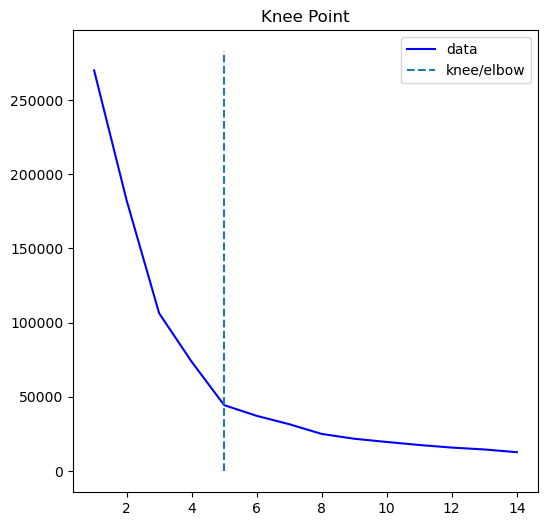

In [112]:
ke.plot_knee()
print('Optimal Number of Cluster is =', ke.knee)

In [113]:
km = KMeans(n_clusters=5) #i know 5 is optimal
df['Group2'] = km.fit_predict(df[['score', 'income']])

In [114]:
cen = km.cluster_centers_
cen

array([[79.36363636, 25.72727273],
       [17.11428571, 88.2       ],
       [82.12820513, 86.53846154],
       [20.91304348, 26.30434783],
       [49.51851852, 55.2962963 ]])

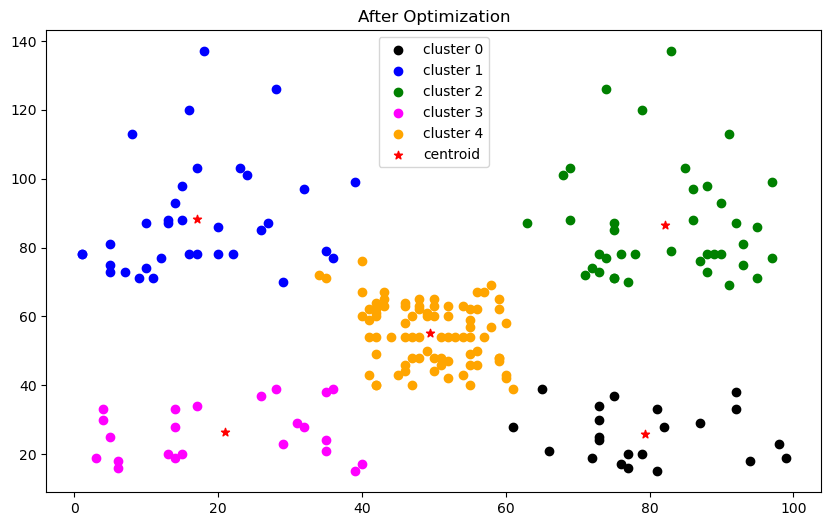

In [115]:
df0 = df[df.Group2 == 0]
df1 = df[df.Group2 == 1]
df2 = df[df.Group2 == 2]
df3 = df[df.Group2 == 3]
df4 = df[df.Group2 == 4]

plt.figure(figsize=(10,6))
plt.scatter(df0.score, df0.income, color='black', label='cluster 0')
plt.scatter(df1.score, df1.income, color='blue', label='cluster 1')
plt.scatter(df2.score, df2.income, color='green', label='cluster 2')
plt.scatter(df3.score, df3.income, color='magenta', label='cluster 3')
plt.scatter(df4.score, df4.income, color='orange', label='cluster 4')

plt.scatter(cen[:, 0], cen[:,1], color='red', label='centroid', marker='*')
plt.title('After Optimization')

plt.legend()